## Goal Classify Infection, Sterile inflammation and 

In [7]:
# Import Modules as needed
%matplotlib inline 
import numpy as np
from mylocal_functions import *
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Create list of files and allocate variables needed for analysis

In [8]:
#List
CEST_list=get_ipython().getoutput('ls ../Study_03_CBA/*CEST.txt')
# Columns for DataFrame
col_names=['A1','W1','C1','A2','W2','C2','A3','W3','C3','scaling_factor']
# Rows for Tissue type
#Tissue_names=["Infected","Healthy R","Sterile Infl.","Healthy L"]
Tissue_names=["Yes","No","No","No"]
# Saturation Offsets
ppm=np.linspace(-8,8,101);  
# Data Frames
CEST_fit=pd.DataFrame()

## 2. Create Data Frame and scale it

In [9]:
M=np.zeros([1,4])
pars=np.zeros([4,10])
lsq=np.zeros([4,1])

for i in range( len(CEST_list) ):
    D=txt_2_array(CEST_list[i]);       #Convert txt file to array
    Zn=normalize_data(D.T,8);          Zn=Zn[:,9::]

    for j in range(4):
        Y=Zn[j,:]
        R=fit_L3_scale(ppm,Y); p=R['Parameters']
        L=Lscale3(ppm,p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9]);
        pars[j,:]=p.T
        lsq[j,0]=  R['RSQ']
    # data frame for current mouse
    df=pd.DataFrame(pars,columns=col_names)
    df["RSQ"]=lsq    
    df["Infected"]=Tissue_names 
    
    # append to final dataframe
    CEST_fit=CEST_fit.append(df, ignore_index=True)
        
CEST_fit.head(1)

,A1,W1,C1,A2,W2,C2,A3,W3,C3,scaling_factor,RSQ,Infected
0,0.55874,2.673309,-0.006661,0.108497,5.717398,-3.660337,0.119251,5.0,1.954477,0.076354,0.999742,Yes


In [50]:
from sklearn.preprocessing import MaxAbsScaler
#import MinMaxScaler
scaler = MaxAbsScaler()
CEST_fit[['A1','W1','C1','A2','W2','C2','A3','W3','C3','scaling_factor']] = scaler.fit_transform(CEST_fit[['A1','W1','C1','A2','W2','C2','A3','W3','C3','scaling_factor']])    


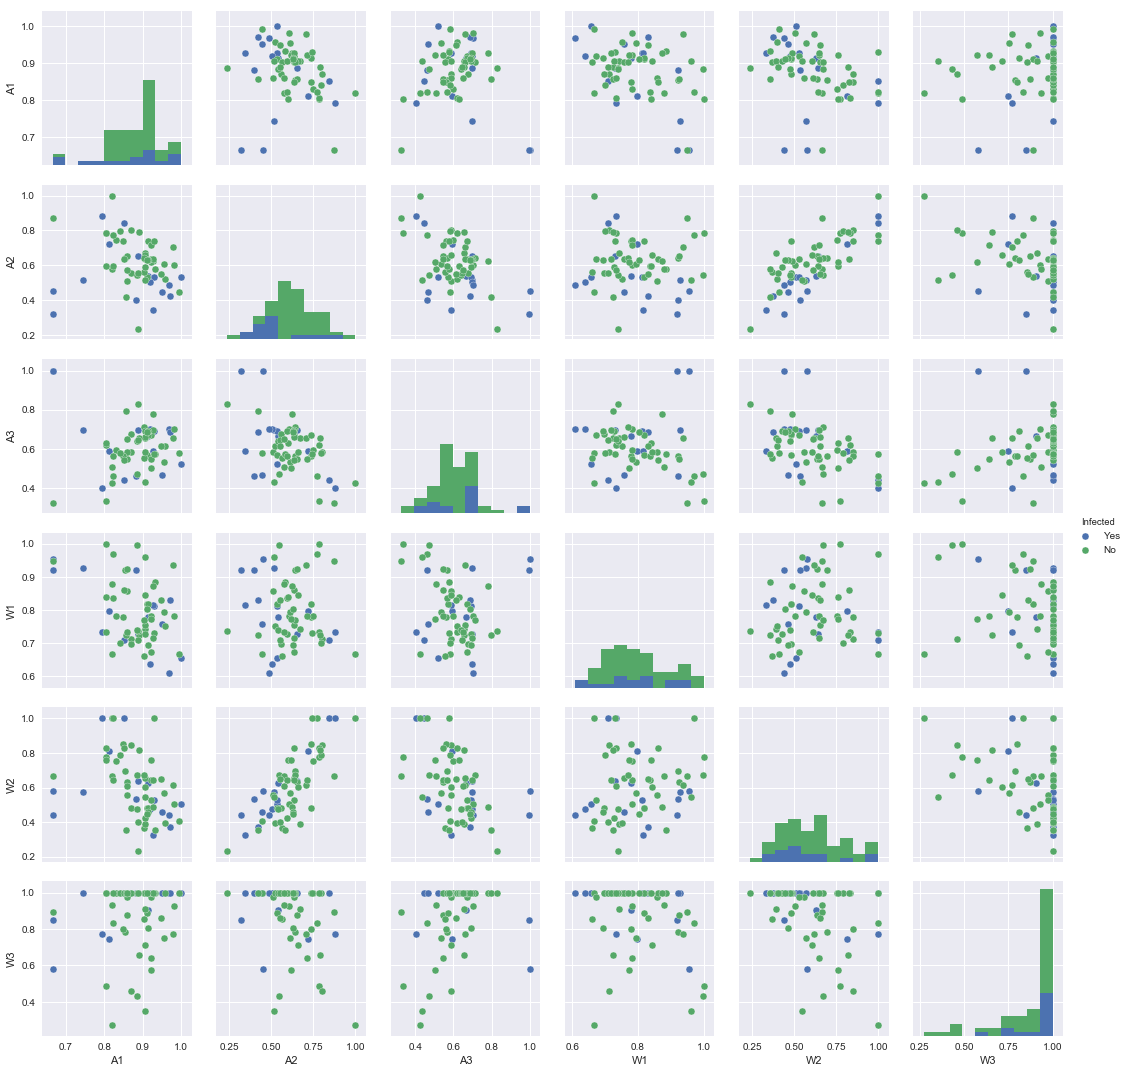

In [59]:
df=CEST_fit[["A1",'A2','A3','W1','W2','W3','Infected']]
sns.pairplot(df, hue="Infected")

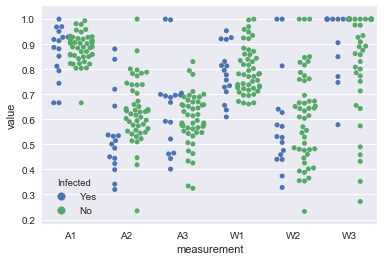

In [60]:
sns.swarmplot(x="measurement", y="value", hue="Infected",split=True, data=pd.melt(df, "Infected", var_name="measurement"))

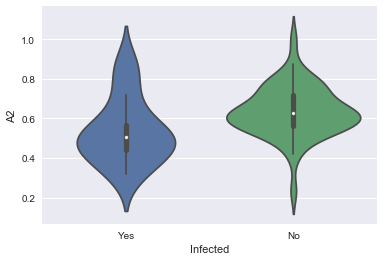

In [62]:

ax = sns.violinplot(x='Infected',y="A2",data=CEST_fit)

In [54]:
# Show the survival proability as a function of age and sex
df=CEST_fit[["A1","A2"]]
yy=np.ones((df.A1.values.shape[0],1))
yy[CEST_fit.Infected=='No']=0
df["Inf"]=yy

/Users/Julio/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/Julio/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


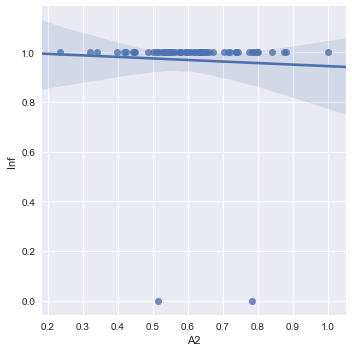

In [56]:
sns.lmplot(x='A2', y='Inf',data=df)